In [9]:
# loading libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [10]:
np.random.seed(613)
x1 = np.arange(50)
y1 = np.random.randint(0,75,50)
x2 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y2 = np.array([110, 180, 240, 99, 220])

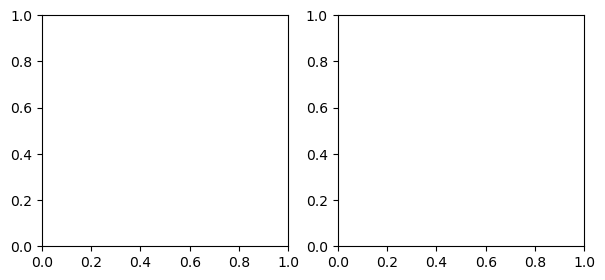

In [11]:
# creating two plots next to each other -- multiple axes and relative positions

fig,(ax1, ax2) = plt.subplots(ncols=2,
                            nrows=1,
                            figsize=(7,3))

/var/folders/k8/rzx6w47n0w9_9kx8c1_cr8lh0000gn/T/ipykernel_54988/3075818095.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


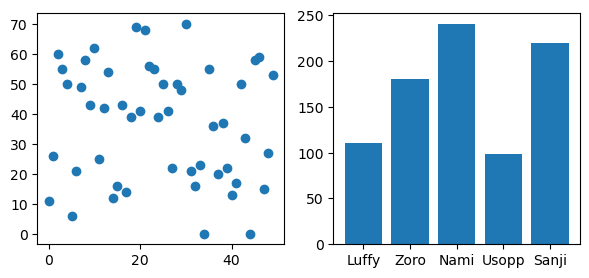

In [12]:
# defining types of viz that we want to see in each plot

fig,(ax1, ax2) = plt.subplots(ncols=2,
                            nrows=1,
                            figsize=(7,3))

ax1.scatter(x1,y1)
ax2.bar(x2,y2)
fig.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Luffy'),
  Text(1, 0, 'Zoro'),
  Text(2, 0, 'Nami'),
  Text(3, 0, 'Usopp'),
  Text(4, 0, 'Sanji')])

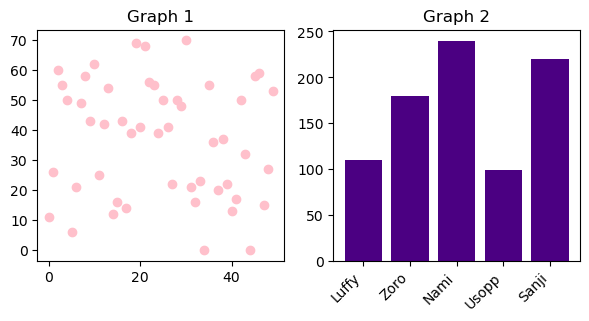

In [19]:
# customizing plots

fig,(ax1, ax2) = plt.subplots(ncols=2,
                            nrows=1,
                            figsize=(7,3))

# changing colors
ax1.scatter(x1,y1, color = "pink")
ax2.bar(x2,y2, color = "indigo")

# adding titles
ax1.set_title("Graph 1")
ax2.set_title("Graph 2")

# tilting x-axis label
plt.xticks(rotation=45, ha = "right")

FYI, to change colors of the bars:

import matplotlib.pyplot as plt

people = ['Alice', 'Bob', 'Charlie']
scores = [85, 92, 78]
colors = ['red', 'green', 'blue']  # one color per person

plt.bar(people, scores, color=colors)
plt.show()

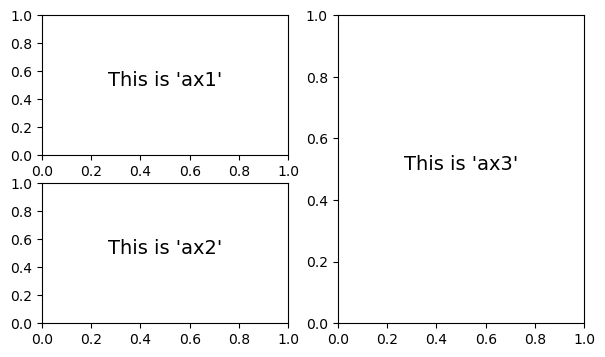

In [ ]:
# changing arrangement of the plots using mosaic function

fig, someaxes = plt.subplot_mosaic([["ax1", "ax3"],
                                ["ax2", "ax3"]],
                                figsize=(7,4))

for label, ax in someaxes.items():
    ax.text(0.5, 0.5, f"This is {label!r}",
            fontsize = 14,
            ha = "center",
            transform = ax.transAxes)

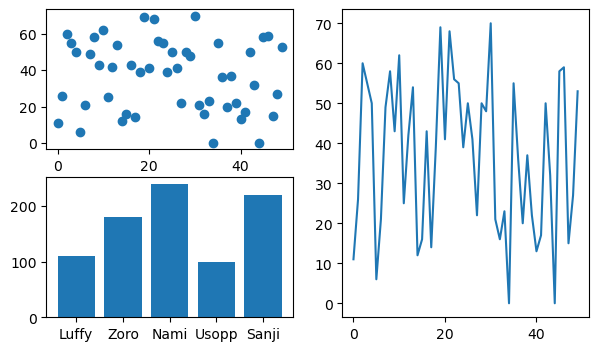

In [23]:
# adding data to the subplots

fig, someaxes = plt.subplot_mosaic([["ax1", "ax3"],
                                    ["ax2", "ax3"]],
                                    figsize = (7,4))

someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)

Text(0.5, 0, 'Label 3: 3 Fast 3 Furious')

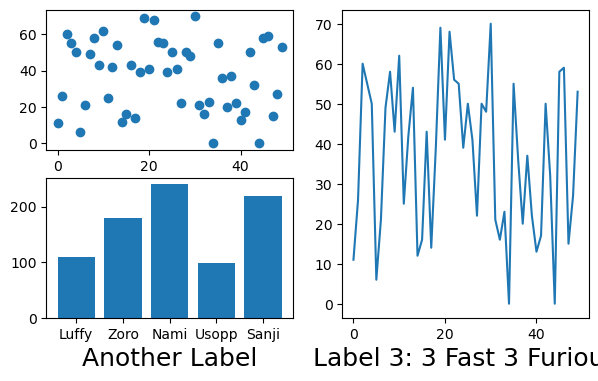

In [24]:
# adding large x-axis titles to previous plot

fig, someaxes = plt.subplot_mosaic([["ax1", "ax3"],
                                    ["ax2", "ax3"]],
                                    figsize = (7,4))

someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)
someaxes["ax1"].set_xlabel("A Big Label", fontsize = 18)
someaxes["ax2"].set_xlabel("Another Label", fontsize = 18)
someaxes["ax3"].set_xlabel("Label 3: 3 Fast 3 Furious", fontsize = 18)

Text(0.5, 0, 'Label 3: 3 Fast 3 Furious')

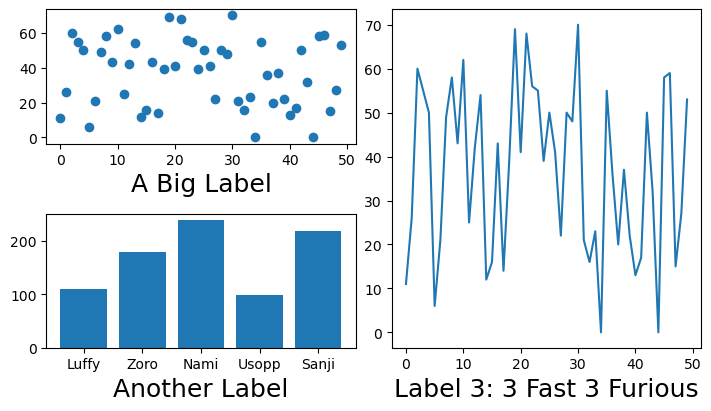

In [27]:
# to fix this, change the layout to constrained or tight

fig, someaxes = plt.subplot_mosaic([["ax1", "ax3"],
                                    ["ax2", "ax3"]],
                                    figsize = (7,4),
                                    layout = "constrained")     # specifying layout

someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)
someaxes["ax1"].set_xlabel("A Big Label", fontsize = 18)
someaxes["ax2"].set_xlabel("Another Label", fontsize = 18)
someaxes["ax3"].set_xlabel("Label 3: 3 Fast 3 Furious", fontsize = 18)

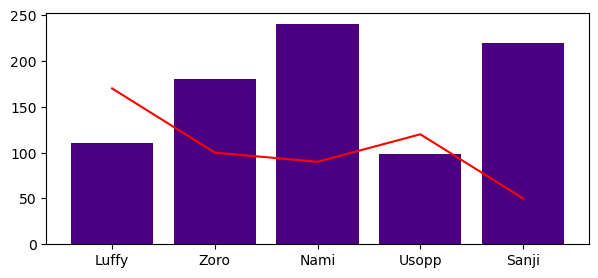

In [29]:
# creating multiple viz on one axes object

# make sample data
x = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])
y2 = np.array([170, 100, 90, 120, 50])

# define figure and axes
fig, ax = plt.subplots(figsize=(7,3))

# now call both bar and plot elements to the same axes
ax.bar(x, y1,
       color = "indigo")
ax.plot(x, y2,
        color= "red")

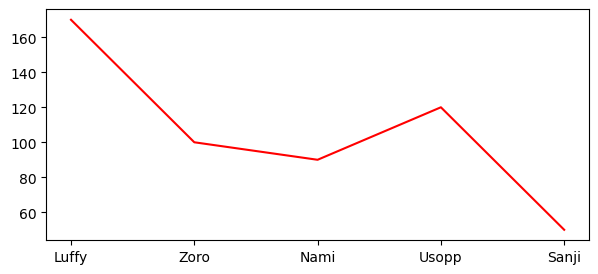

In [30]:
# adding error information

# calculate standard deviation
y2_sd = np.std(y2)

# plot line
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(x, y2, color = "red")

<ErrorbarContainer object of 3 artists>

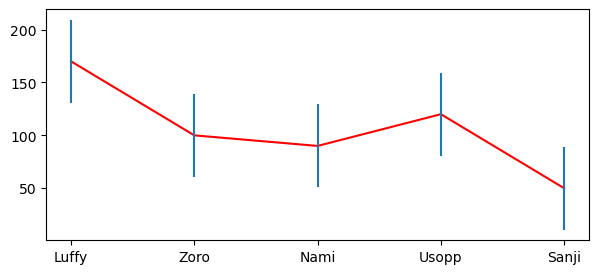

In [34]:
# use errorbar() to add in error line (i.e., standard deviation in this case)
# yerr specifies that we're plotting vertical error bars
# fmt makes sure we're not plotting the actual data points

fig, ax = plt.subplots(figsize=(7,3))
ax.plot(x, y2, color = "red")

ax.errorbar(x, y2, yerr = y2_sd, fmt = "none")

<ErrorbarContainer object of 3 artists>

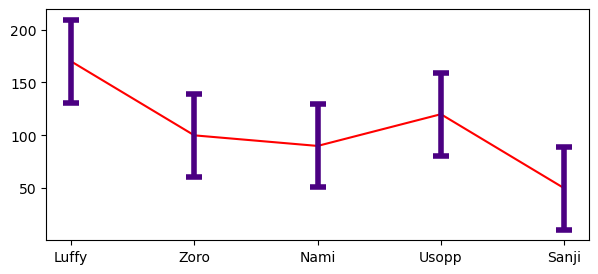

In [35]:
# customizing errorbar appearance

fig, ax = plt.subplots(figsize=(7,3))
ax.plot(x, y2, color = "red")
ax.errorbar(x, y2, yerr = y2_sd, fmt = "none", ecolor = "indigo", elinewidth = 4, capsize = 6, capthick = 4)

<ErrorbarContainer object of 3 artists>

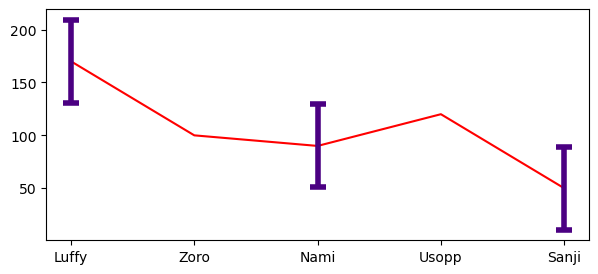

In [36]:
# if you dont' want to see error bars for every single point, can specify intervals using errorevery

fig, ax = plt.subplots(figsize=(7,3))
ax.plot(x, y2, color = "red")
ax.errorbar(x, y2, yerr = y2_sd, fmt = "none", ecolor = "indigo", elinewidth = 4, capsize = 6, capthick = 4, errorevery = 2)

In [37]:
# adding images to plots

# load in libraries
from PIL import Image       # to open images
import requests             # to get images from URLs
from io import BytesIO      # to store images

In [38]:
# getting image from the internet

response = requests.get("https://upload.wikimedia.org/wikipedia/en/c/cb/Monkey_D_Luffy.png")
image_file = BytesIO(response.content)
image = Image.open(image_file)

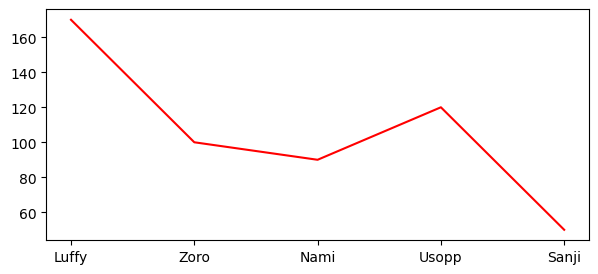

In [39]:
# making basic line plot

fig, ax = plt.subplots(figsize = (7,3))
ax.plot(x, y2, color = "red")

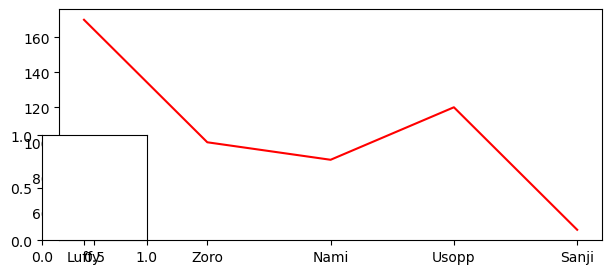

In [41]:
# overlaying new axis ("ax_image") on figure (on top of "ax") to act as a container for image
fig, ax = plt.subplots(figsize = (7,3))
ax.plot(x, y2, color = "red")

ax_image = fig.add_axes([0.1,   # x-coordinate on figure (not axes)
                         0.11,  # y-coordinate on figure (not axes)
                         0.15,  # image width
                         0.35]) # image height

(-0.5, 219.5, 425.5, -0.5)

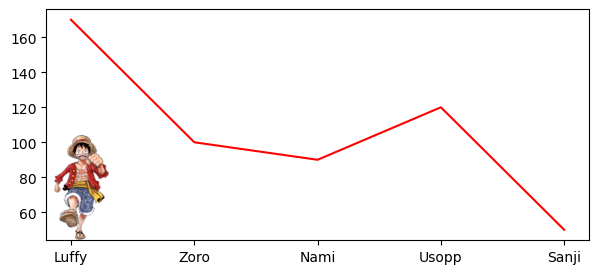

In [42]:
# using imshow() to add image

fig, ax = plt.subplots(figsize = (7,3))
ax.plot(x, y2, color = "red")

ax_image = fig.add_axes([0.1, 0.11, 0.15, 0.35])

ax_image.imshow(image)
ax_image.axis("off")

Need to trial and error to figure out where to place the image

Image has to be .png format

To save visualization, hover over plot and click on "Save"

# saving visualizations programatically

# defining where to save visualization
path = "path"       # can be full path or relative path
filename = "filename.png"

# saving visualization
plt.savefig(path+filename, dpi = 300)   # path shouldn't end with / since file name starts with it